In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/NEW DATA'

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

 99% 652M/658M [00:10<00:00, 62.0MB/s]
100% 658M/658M [00:10<00:00, 66.5MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
!ls

 best_model.h5						    plantvillage
 drive							    PlantVillage
 Frogeye-spots-Botryosphaeria-obtusa-on-apple-leaf-FB.jpg   sample_data
'new plant diseases dataset(augmented)'			    test
'New Plant Diseases Dataset(Augmented)'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot 
import os
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions

In [ ]:
# Exploaratory data analyisi
len(os.listdir("/content/PlantVillage"))

15

In [ ]:
len(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_data = ImageDataGenerator(zoom_range = 0.5,shear_range=0.3,horizontal_flip = True,preprocessing_function = preprocess_input)
val_data = ImageDataGenerator(preprocessing_function=preprocess_input )


In [ ]:
train = train_data.flow_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                       target_size = (256,256), # height,width
                                       batch_size = 32) # batch size = the number of training examples in one forward/backward pass
val = val_data.flow_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
                             target_size = (256,256),
                             batch_size = 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
#MODEL

In [ ]:
from keras.layers import Dense,Flatten  #Flatten layers are used when you got a multidimensional output and you want to make it linear to pass it onto a Dense layer
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape = (256,256,3),include_top = False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units = 38,activation ='softmax')(X)

# MODEL CREATION
model = Model(base_model.input, X)

In [ ]:

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model.compile(optimizer='adam',loss = keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [ ]:

# EARLY STOPPING AND MODEL CHECK POINTS

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping 

In [ ]:
# early stopping 
earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              min_delta = 0.01,
                              patience =10,
                              verbose=1)

# model check point 
modelcheckpoint = ModelCheckpoint(filepath ="best_model.h5",
                                  monitor ='val_accuracy',
                                  min_delta = 0.001,
                                  patience =10,
                                  verbose = 1,
                                  save_best_only = True)


call_back = [earlystopping,modelcheckpoint] # creating array, because to train a model the input is taken only as a array



In [ ]:
his = model.fit_generator(train,
                          steps_per_epoch=16,
                          epochs = 50,
                          verbose = 1,
                          callbacks = call_back,
                          
                          validation_data= val,
                          validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 7.8097 - accuracy: 0.8164
Epoch 1: val_accuracy improved from -inf to 0.83789, saving model to best_model.h5
16/16 [==============================] - 13s 819ms/step - loss: 7.8097 - accuracy: 0.8164 - val_loss: 5.6250 - val_accuracy: 0.8379
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 9.0276 - accuracy: 0.7617
Epoch 2: val_accuracy did not improve from 0.83789
16/16 [==============================] - 13s 803ms/step - loss: 9.0276 - accuracy: 0.7617 - val_loss: 6.0808 - val_accuracy: 0.8301
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 8.4929 - accuracy: 0.7754
Epoch 3: val_accuracy improved from 0.83789 to 0.83984, saving model to best_model.h5
16/16 [==============================] - 13s 834ms/step - loss: 8.4929 - accuracy: 0.7754 - val_loss: 5.0204 - val_accuracy: 0.8398
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 8.2174 - accuracy: 0.7832
Epoch 4:

In [ ]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

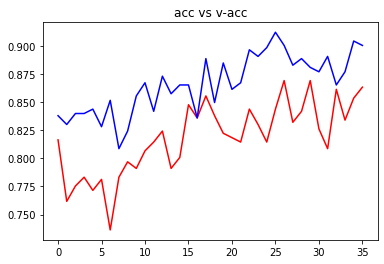

In [ ]:
plt.plot(h['accuracy'],c = "red")
plt.plot(h['val_accuracy'],c = "blue")
plt.title("acc vs v-acc")
plt.show()

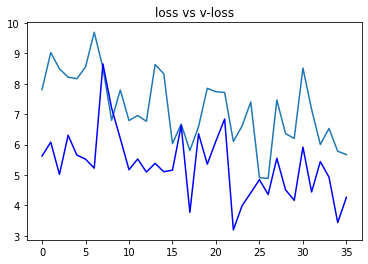

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = "blue")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# LOAD BEST MODEL
from keras.models import load_model
model = load_model('/content/best_model.h5')

In [ ]:
acc = model.evaluate_generator(val)[1]
print(f"The accuracy of model is = {acc*100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of model is = 89.88732099533081%


In [ ]:
refer = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
# predict the disease 
def pred(path):

  img = load_img(path,target_size =(256,256))
  i =img_to_array(img)
  pre = preprocess_input(i)

  img = np.expand_dims(pre,axis = 0)
  predic = np.argmax(model.predict(img))
  print(f"The image belongs to = {refer[predic]}")
 



In [ ]:
# COPY AND PASTE THE PATH OF THE LEAF AFTER UPLOADING ANY IMAGE INTO THE COLAB
path = "/content/plantvillage/PlantVillage/Potato___Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG"
pred(path)

The image belongs to = Potato___Late_blight
